Background: Minecraft background, research background/reason, state of knowledge, knowledge deficit (semi-check)


Questions: research question (Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? --> specific)/ or claim. --> response variable, multiple predictive variables
--> Can x's predict y in dataset? (semi-check) 

In [1]:
install.packages("stargazer")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
library(stargazer)
#library(infer)
#library(cowplot)
#library(tidyclust)
#library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(players,10)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Data description: Describe whats in the player dataset, number of observation, summary statistics, number of variables, name and type of variables, what the variables mean, any issues I see with the data, any other potential issues ralted to things you cannot see (*control variables), how the data were collected), etc. bullet points list or table to summarize the variables in an easy-to-understand format.

In [5]:
cleaned_players <- players |>
    select(-hashedEmail, -name) |>
    mutate(subscribe = as.factor(subscribe),
          experience = as.factor(experience),
          gender = as.factor(gender)) |>
    drop_na() |>
    rename(age = Age)
head(cleaned_players,10)

experience,subscribe,played_hours,gender,age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


In [6]:
stargazer(
    as.data.frame(cleaned_players[c("played_hours", "age")]),
    type = "text",
    title = "Summary Statistics for Played Hours and Age",
    digits = 6,
    summary.stat = c("mean", "median", "sd", "min", "max", "n"))


Summary Statistics for Played Hours and Age
Statistic      Mean     Median  St. Dev.    Min       Max      N 
-----------------------------------------------------------------
played_hours 5.904639  0.100000 28.497930 0.000000 223.100000 194
age          20.520620    19    6.174667     8         50     194
-----------------------------------------------------------------


In [7]:
sub_count <- cleaned_players |>
    count(subscribe) |>
    arrange(desc(n))
experience_count <- cleaned_players |>
    count(experience) |>
    arrange(desc(n))
gender_count <- cleaned_players |>
    count(gender) |>
    arrange(desc(n))
sub_count
experience_count # use experience and gender for difference player types
gender_count

subscribe,n
<fct>,<int>
TRUE,142
FALSE,52


experience,n
<fct>,<int>
Amateur,63
Veteran,48
Beginner,35
Regular,35
Pro,13


gender,n
<fct>,<int>
Male,124
Female,37
Non-binary,15
Prefer not to say,11
Two-Spirited,5
Agender,2


How to make hours played and age vs. experience and gender...

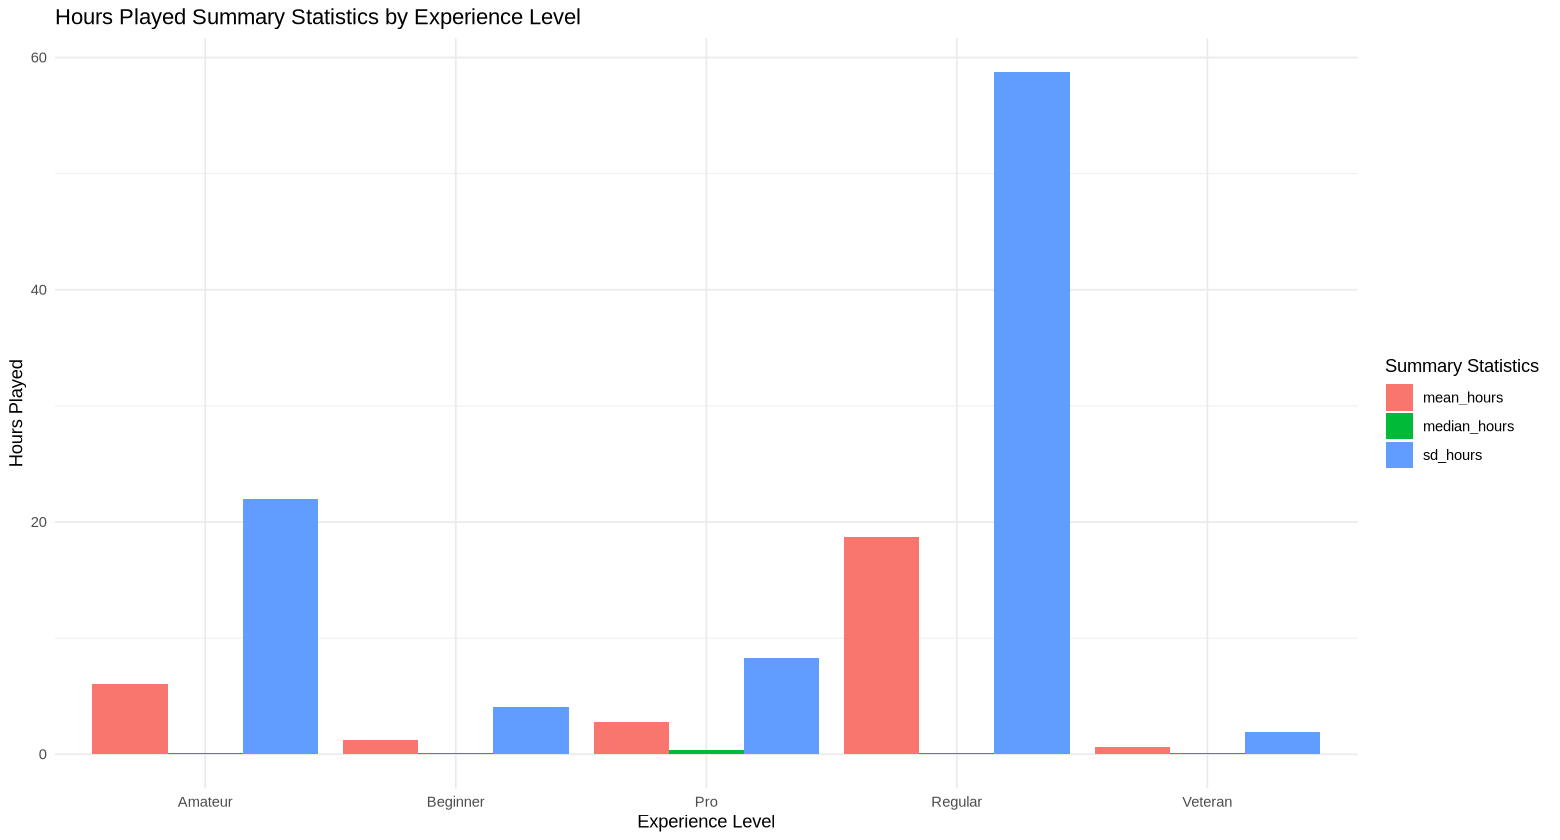

In [51]:
experience_vs_hours <- cleaned_players |>
    group_by(experience) |>
    summarize(mean_hours = mean(played_hours), 
              median_hours = median(played_hours),
              sd_hours = sd(played_hours)) |>
    pivot_longer(cols = c(mean_hours, median_hours, sd_hours),
                 names_to = "summary_type",
                 values_to = "hours") |>
    ggplot(aes(x = experience, y = hours, fill = summary_type)) +
    geom_col(position = "dodge") + 
    labs(title = "Hours Played Summary Statistics by Experience Level",
         x = "Experience Level",
         y = "Hours Played",
         fill = "Summary Statistics") +
    theme_minimal()
experience_vs_hours

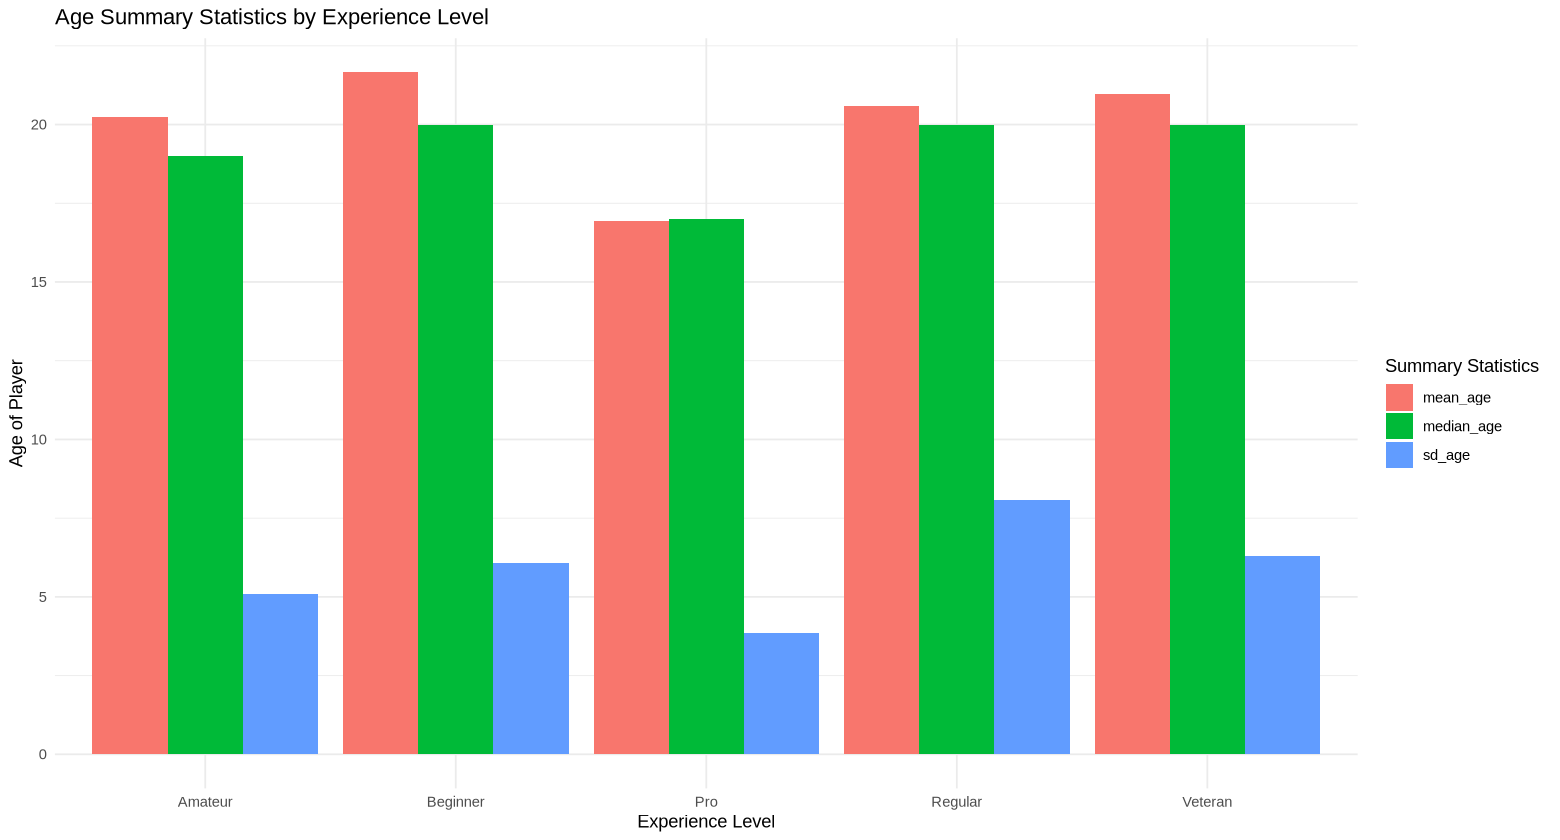

In [47]:
experience_vs_age <- cleaned_players |>
    group_by(experience) |>
    summarize(mean_age = mean(age),
              median_age = median(age),
              sd_age = sd(age)) |>
    pivot_longer(cols = c(mean_age, median_age, sd_age),
                 names_to = "summary_type",
                 values_to = "age") |>
    ggplot(aes(x = experience, y = age, fill = summary_type)) +
    geom_col(position = "dodge") + 
    labs(title = "Age Summary Statistics by Experience Level",
         x = "Experience Level",
         y = "Age of Player",
         fill = "Summary Statistics") +
    theme_minimal()
experience_vs_age

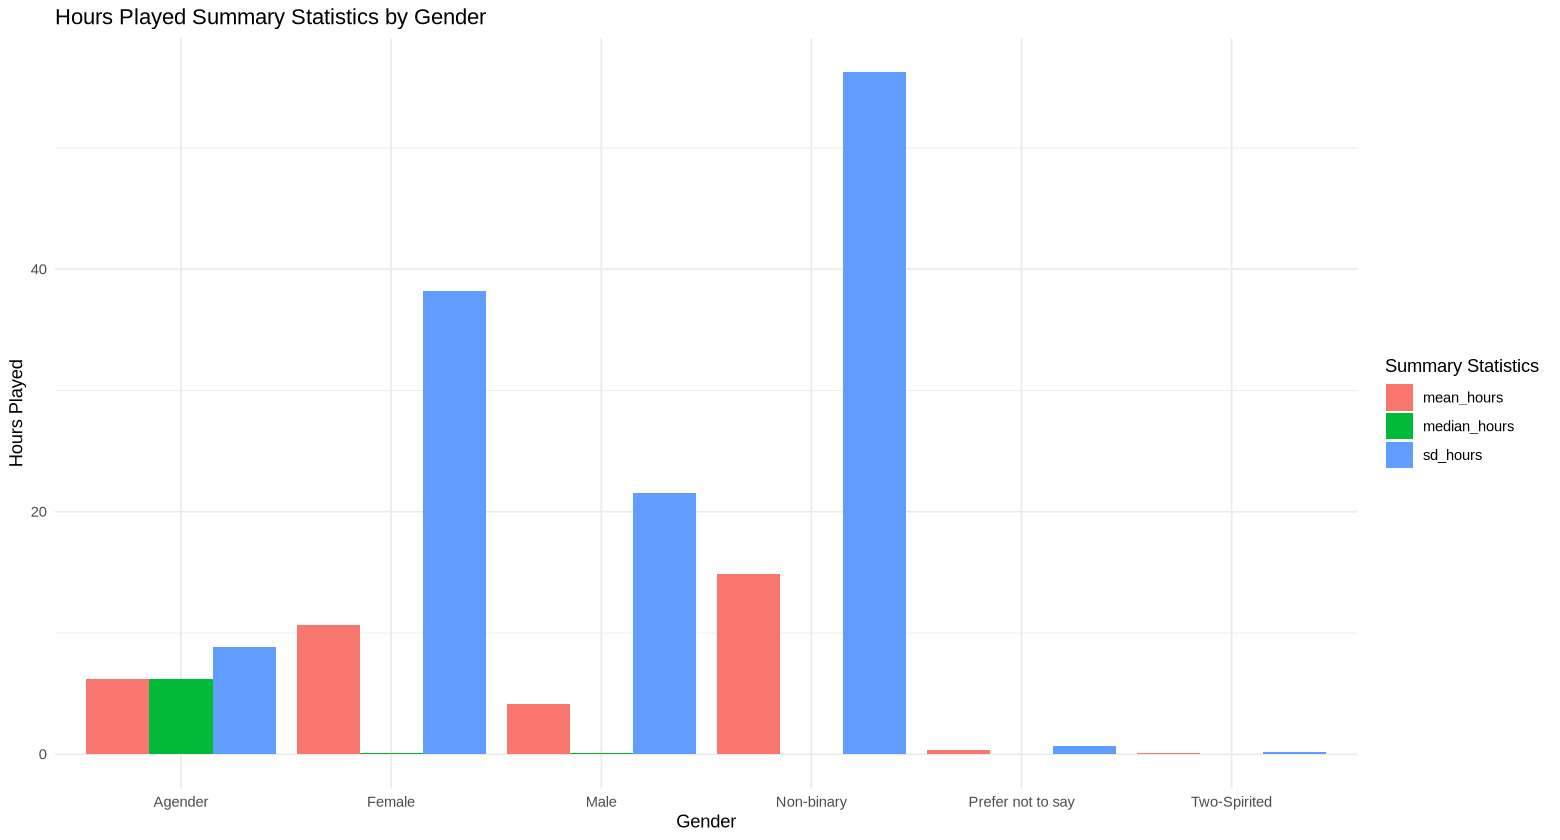

In [52]:
gender_vs_hours <- cleaned_players |>
    group_by(gender) |>
    summarize(mean_hours = mean(played_hours),
              median_hours = median(played_hours),
              sd_hours = sd(played_hours)) |>
    pivot_longer(cols = c(mean_hours, median_hours, sd_hours),
                 names_to = "summary_type",
                 values_to = "hours") |>
    ggplot(aes(x = gender, y = hours, fill = summary_type)) +
    geom_col(position = "dodge") + 
    labs(title = "Hours Played Summary Statistics by Gender",
         x = "Gender",
         y = "Hours Played",
         fill = "Summary Statistics") +
    theme_minimal()
gender_vs_hours

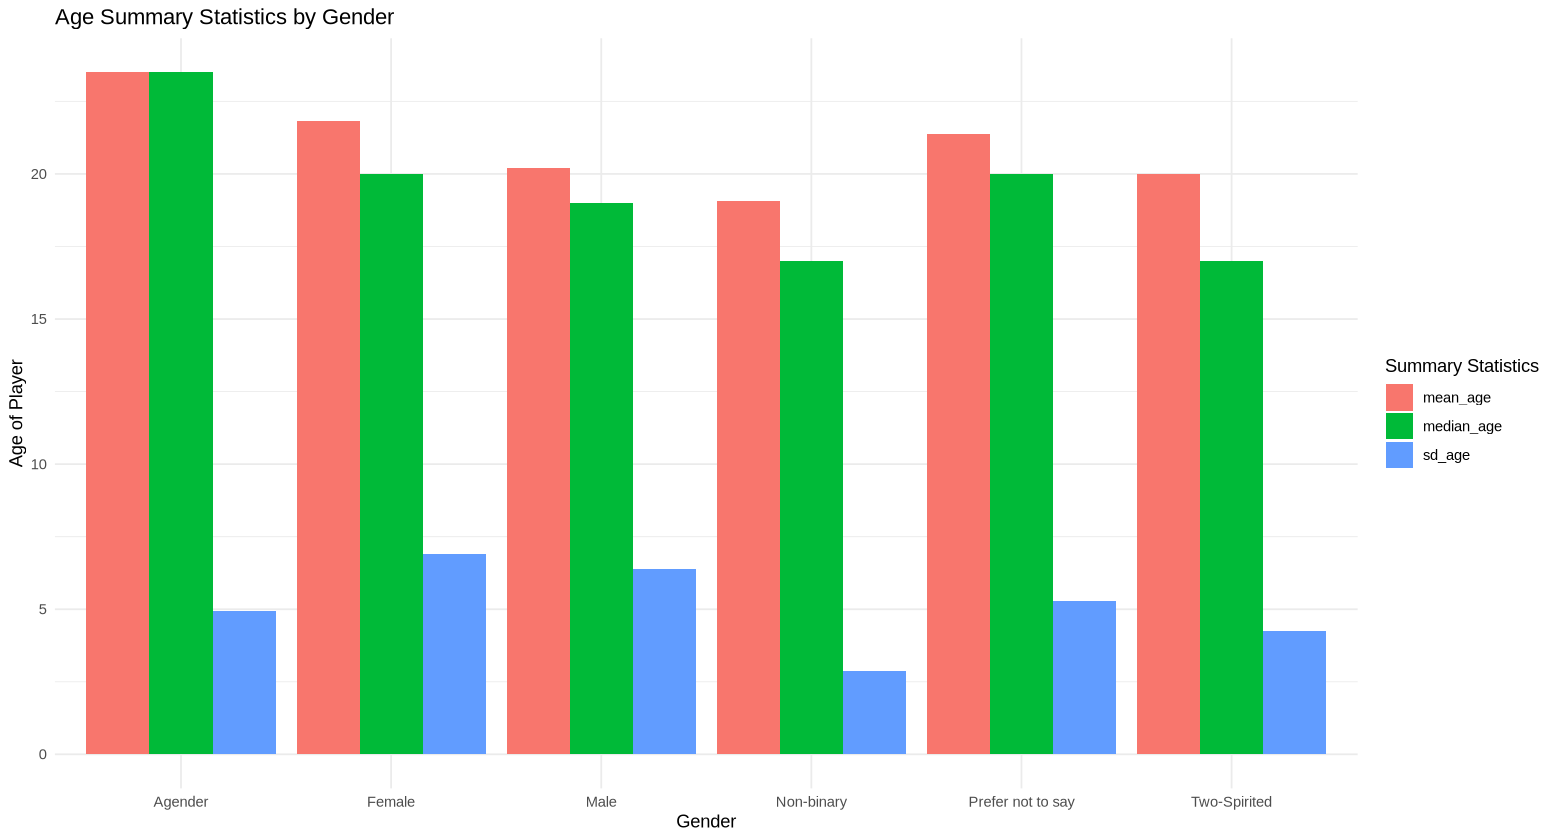

In [53]:
gender_vs_age <- cleaned_players |>
    group_by(gender) |>
    summarize(mean_age = mean(age),
              median_age = median(age),
              sd_age = sd(age)) |>
    pivot_longer(cols = c(mean_age, median_age, sd_age),
                 names_to = "summary_type",
                 values_to = "age") |>
    ggplot(aes(x = gender, y = age, fill = summary_type)) +
    geom_col(position = "dodge") + 
    labs(title = "Age Summary Statistics by Gender",
         x = "Gender",
         y = "Age of Player",
         fill = "Summary Statistics") +
    theme_minimal()
gender_vs_age

$title
[1] "Relationship between Hours played and Age of Players to Subscription to Game Articles (Unstandardized)"

attr(,"class")
[1] "labels"

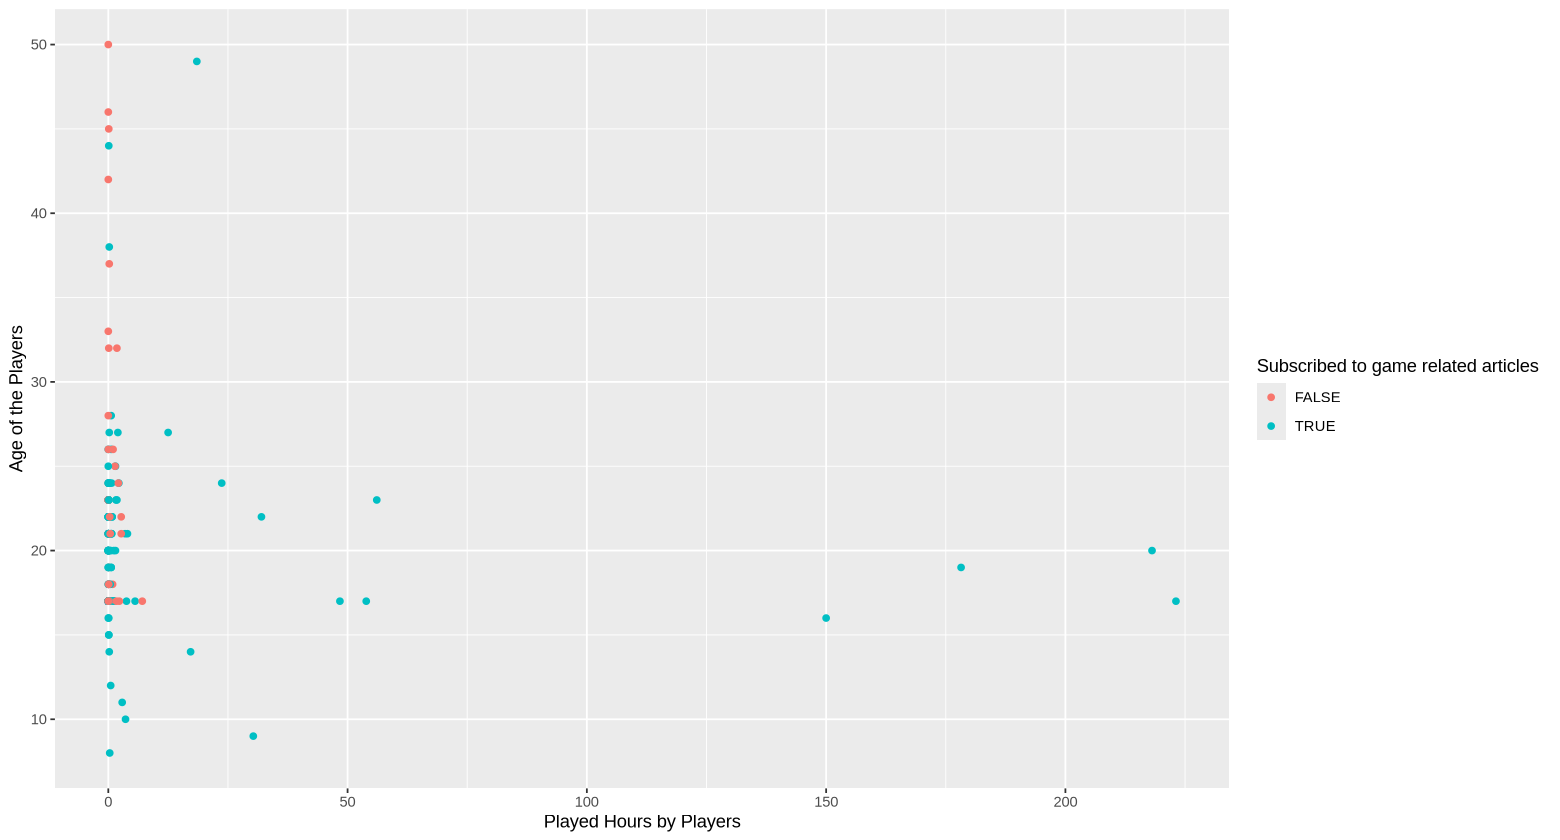

In [8]:
options(repr.plot.width = 13, repr.plot.height = 7)
cleaned_players_plot <- cleaned_players |>
    ggplot(aes(x = played_hours, y = age)) +
    geom_point(aes(color = subscribe)) +
    xlab("Played Hours by Players") +
    ylab("Age of the Players") +
    labs(color = "Subscribed to game related articles")
    ggtitle("Relationship between Hours played and Age of Players to Subscription to Game Articles (Unstandardized)")
cleaned_players_plot

In [9]:
cleaned_players_loged <- cleaned_players |>
    mutate(log_played_hours = log1p(played_hours)) |>
    select(-played_hours) |>
    rename(log_hours = log_played_hours)

cleaned_players_recipe <- recipe(subscribe ~ log_hours + age, data = cleaned_players_loged) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

cleaned_players_scaled <- cleaned_players_recipe |>
    prep() |>
    bake(cleaned_players_loged)

head(cleaned_players_scaled,10)

log_hours,age,subscribe
<dbl>,<dbl>,<fct>
2.80888815,-1.86578776,TRUE
1.01440631,-0.57017138,TRUE
-0.48684676,-0.57017138,FALSE
0.02099412,0.07763681,TRUE
-0.39562959,0.07763681,TRUE
-0.48684676,-0.57017138,TRUE
-0.48684676,-0.24626729,TRUE
-0.48684676,0.07763681,FALSE
-0.39562959,-0.57017138,TRUE


In [10]:
stargazer(
    as.data.frame(cleaned_players_scaled[c("log_hours", "age")]),
    type = "text",
    title = "Summary Statistics",
    digits = 6,
    summary.stat = c("mean", "median", "sd", "min", "max", "n"))


Summary Statistics
Statistic   Mean     Median   St. Dev.    Min      Max     N 
-------------------------------------------------------------
log_hours -0.000000 -0.395630 1.000000 -0.486847 4.692828 194
age       0.000000  -0.246267 1.000000 -2.027740 4.774246 194
-------------------------------------------------------------


$title
[1] "Relationship between Hours played and Age of Players to Subscription to Game Articles (Standardized)"

attr(,"class")
[1] "labels"

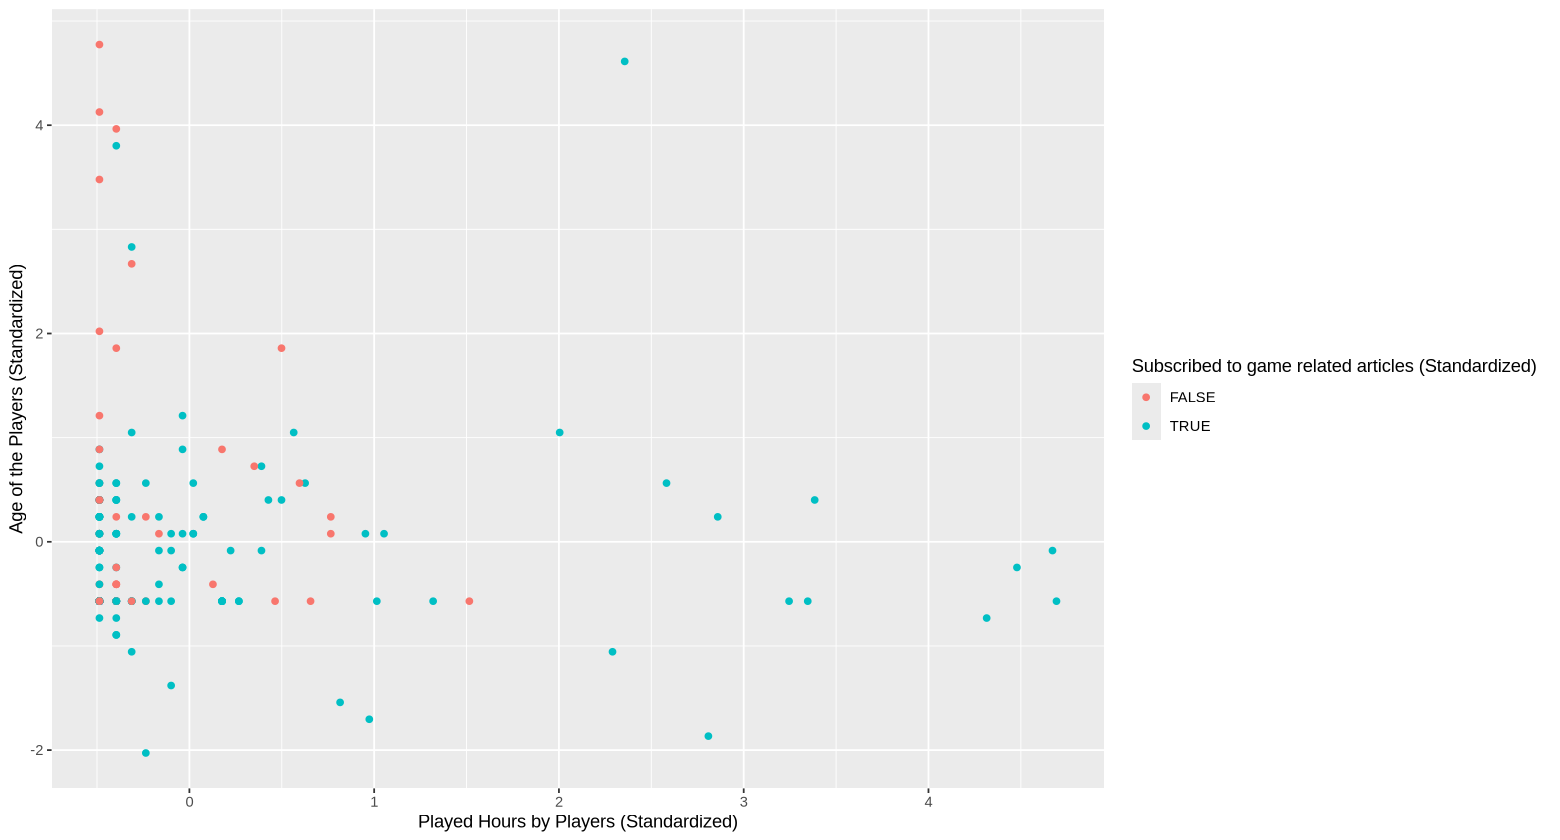

In [11]:
options(repr.plot.width = 13, repr.plot.height = 7)
cleaned_players_plot_standardized <- cleaned_players_scaled |>
    ggplot(aes(x = log_hours, y = age)) +
    geom_point(aes(color = subscribe)) +
    xlab("Played Hours by Players (Standardized)") +
    ylab("Age of the Players (Standardized)") +
    labs(color = "Subscribed to game related articles (Standardized)")
    ggtitle("Relationship between Hours played and Age of Players to Subscription to Game Articles (Standardized)")
cleaned_players_plot_standardized

In [12]:
knn_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
       set_engine("kknn") |>
       set_mode("classification")
knn_fit <- knn_spec |> 
        fit(subscribe ~ log_hours + age, data = cleaned_players_scaled)

In [13]:
players_split <- initial_split(cleaned_players_scaled, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)
head(players_train)
head(players_test)

log_hours,age,subscribe
<dbl>,<dbl>,<fct>
-0.4868468,-0.57017138,FALSE
-0.4868468,0.07763681,FALSE
-0.4868468,0.23958885,FALSE
-0.3956296,-0.40821933,FALSE
0.3510257,0.72544499,FALSE
-0.4868468,0.56349295,FALSE


log_hours,age,subscribe
<dbl>,<dbl>,<fct>
-0.3956296,0.07763681,TRUE
-0.4868468,-0.57017138,TRUE
-0.3956296,-0.57017138,FALSE
0.1765338,-0.57017138,TRUE
-0.4868468,-0.57017138,TRUE
-0.4868468,0.40154090,FALSE


In [14]:
players_recipe <- recipe(subscribe ~ log_hours + age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

In [15]:
players_test_predictions <- predict(players_fit, players_test) |>
    bind_cols(players_test)
head(players_test_predictions)

.pred_class,log_hours,age,subscribe
<fct>,<dbl>,<dbl>,<fct>
TRUE,-0.3956296,0.07763681,TRUE
FALSE,-0.4868468,-0.57017138,TRUE
TRUE,-0.3956296,-0.57017138,FALSE
TRUE,0.1765338,-0.57017138,TRUE
FALSE,-0.4868468,-0.57017138,TRUE
FALSE,-0.4868468,0.40154090,FALSE


In [16]:
players_prediction_accuracy <- players_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)
players_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.57142857
kap,binary,0.06198724


In [17]:
players_mat <- players_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
players_mat

          Truth
Prediction FALSE TRUE
     FALSE     6   14
     TRUE      7   22

24 labelled correctly, 25 labelled incorrectly. Precision for TRUE is 20/29, Precision for FALSE is 16/20, Recall for TRUE is 20/36, Recall for FALSE is 9/13.

In [18]:
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

In [19]:
players_resample_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = players_vfold)

In [20]:
players_matrics <- collect_metrics(players_resample_fit)
players_matrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6140722,5,0.03568978,Preprocessor1_Model1
roc_auc,binary,0.5442061,5,0.08731657,Preprocessor1_Model1


In [21]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

In [25]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = players_vfold, grid = k_vals) |>
       collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4770279,5,0.04787690,Preprocessor1_Model01
1,roc_auc,binary,0.4469156,5,0.02797093,Preprocessor1_Model01
2,accuracy,binary,0.4770279,5,0.04787690,Preprocessor1_Model02
2,roc_auc,binary,0.4639147,5,0.05893971,Preprocessor1_Model02
3,accuracy,binary,0.5729064,5,0.04918467,Preprocessor1_Model03
3,roc_auc,binary,0.4861742,5,0.04771393,Preprocessor1_Model03
4,accuracy,binary,0.5457635,5,0.05943960,Preprocessor1_Model04
4,roc_auc,binary,0.5220857,5,0.05734046,Preprocessor1_Model04
5,accuracy,binary,0.6423645,5,0.04918344,Preprocessor1_Model05


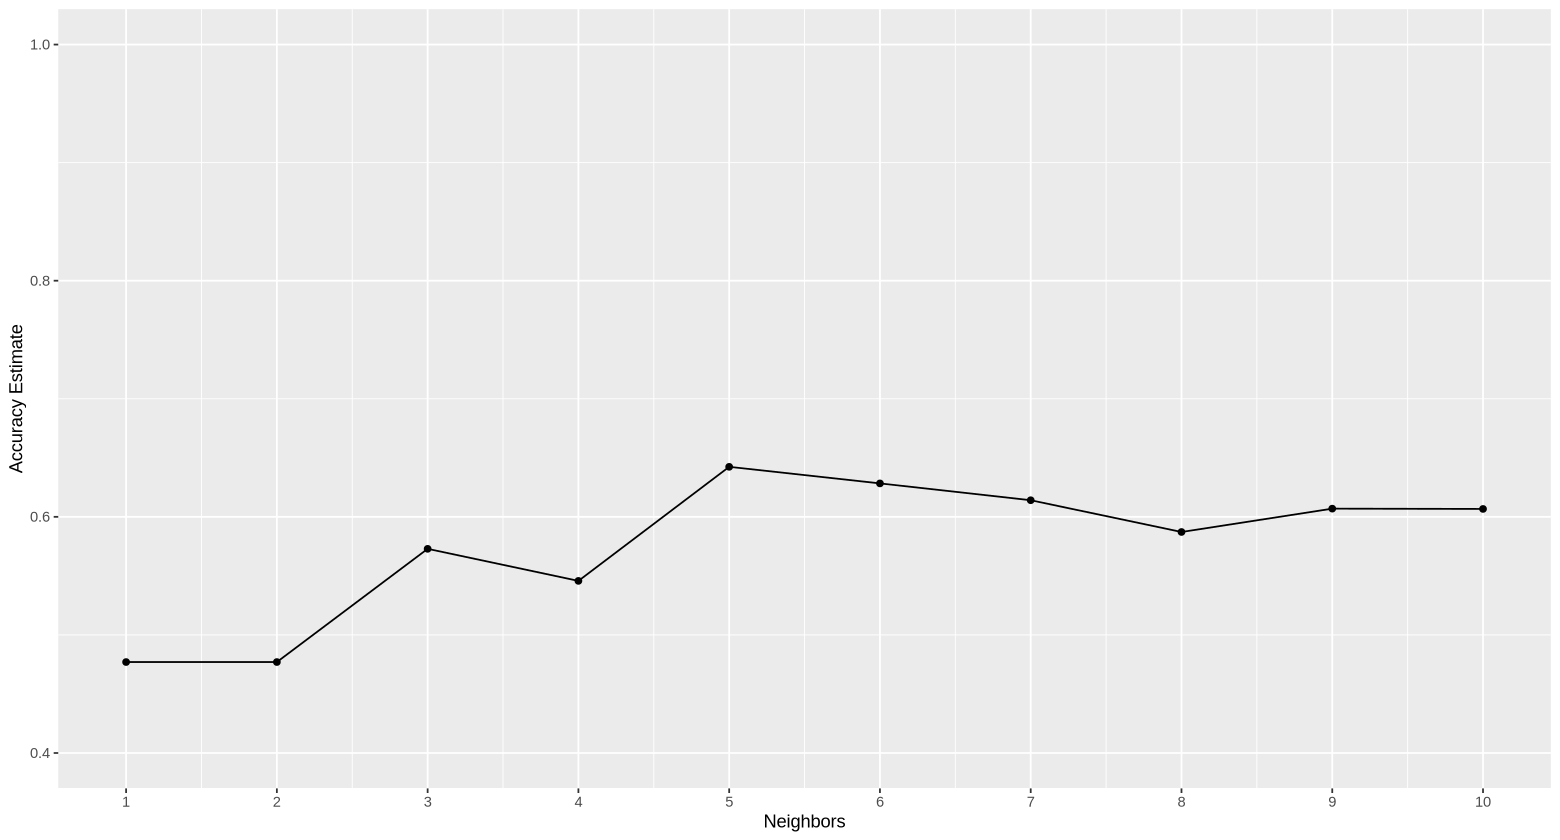

In [26]:
accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) 

accuracy_versus_k

5 neighbors best accuracy

Methods & Results: describe the method for analysis from beginning to end that narrates the analysis code
--> load data, wrangle and clean data for analysis, perform summary of data set for relevant exploratory data analysis related to the planned analysis, create visualization of dataset that is relevant for exploratory data analysis related to the planned analysis. High qual vis (i.e. title, xlab, etc.)
--> explain any insight gained from plots that are relevant to address my questions
--> perform data analysis, "why is this method appropriate, which assumptions are required, if any, to apply the method selected, what are the potential limitation or weaknesses of the method selected, how did you compare and select the model, Note: you should also think about the following:
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?, creates a visualization of the analysis,note: all figures should have a figure number and a legend 


--> Discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?
References
You may include references if necessary, as long as they all have a consistent citation style.


--> forecasts
Conclusion 
Look backwards and forwards and consider significance of research

GitHub Repository

On your GitHub repository, you must have at least five commits with a description of the work that has been done. 

 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.